In [1]:
from pyrlmala.utils.plot import AveragePolicy
import numpy as np

/home/laurence/Code/PythonProjects/pyrlmala/src/pyrlmala/utils/plot.py:1008: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


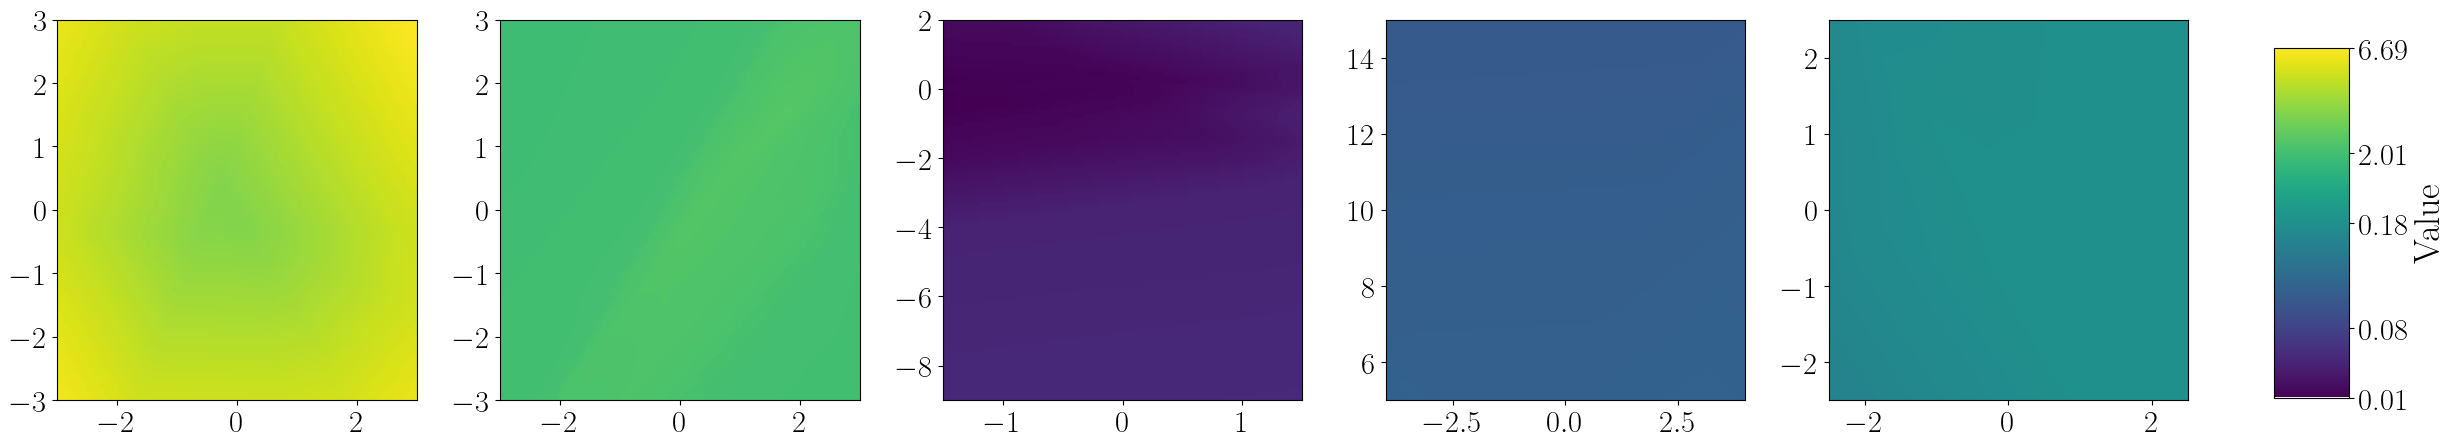

In [2]:
# 假设你已经用 save_policy_matrix 得到了一批 .npy/.csv 并加载成 Z 矩阵：
policy_banana    = np.load("Data/test-banana-test-banana_ddpg_mala_average_policy.npy")
policy_laplace_1    = np.load("Data/test-laplace_1-test-laplace_1_ddpg_mala_average_policy.npy")
policy_laplace_2    = np.load("Data/test-laplace_2-test-laplace_2_ddpg_mala_average_policy.npy")
policy_neals_funnel       = np.load("Data/test-neals_funnel-test-neals_funnel_ddpg_mala_average_policy.npy")
policy_skew_t       = np.load("Data/test-skew_t-test-skew_t_ddpg_mala_average_policy.npy")

# 对应的 ranges：
laplace_1_xr    , laplace_1_yr    = ((-3, 3, 100), (-3, 3, 100))
laplace_2_xr    , laplace_2_yr    = ((-3, 3, 100), (-3, 3, 100))
neals_funnel_xr , neals_funnel_yr = ((-1.5, 1.5, 100), (-9, 2, 100))
banana_xr       , banana_yr       = ((-4, 4, 100), (5, 15, 100))
skew_t_xr       , skew_t_yr       = ((-2.5, 2.5, 100), (-2.5, 2.5, 100))

items=[
        (policy_laplace_1, laplace_1_xr    , laplace_1_yr   , ""),
        (policy_laplace_2, laplace_2_xr    , laplace_2_yr   , ""),
        (policy_neals_funnel, neals_funnel_xr , neals_funnel_yr, ""),
        (policy_banana, banana_xr       , banana_yr      , ""),
        (policy_skew_t, skew_t_xr       , skew_t_yr      , ""),
    ]

AveragePolicy.plot_heatmaps_nonlinear_shared_colorbar(
    items=items,
)


/home/laurence/Code/PythonProjects/pyrlmala/src/pyrlmala/utils/plot.py:1008: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


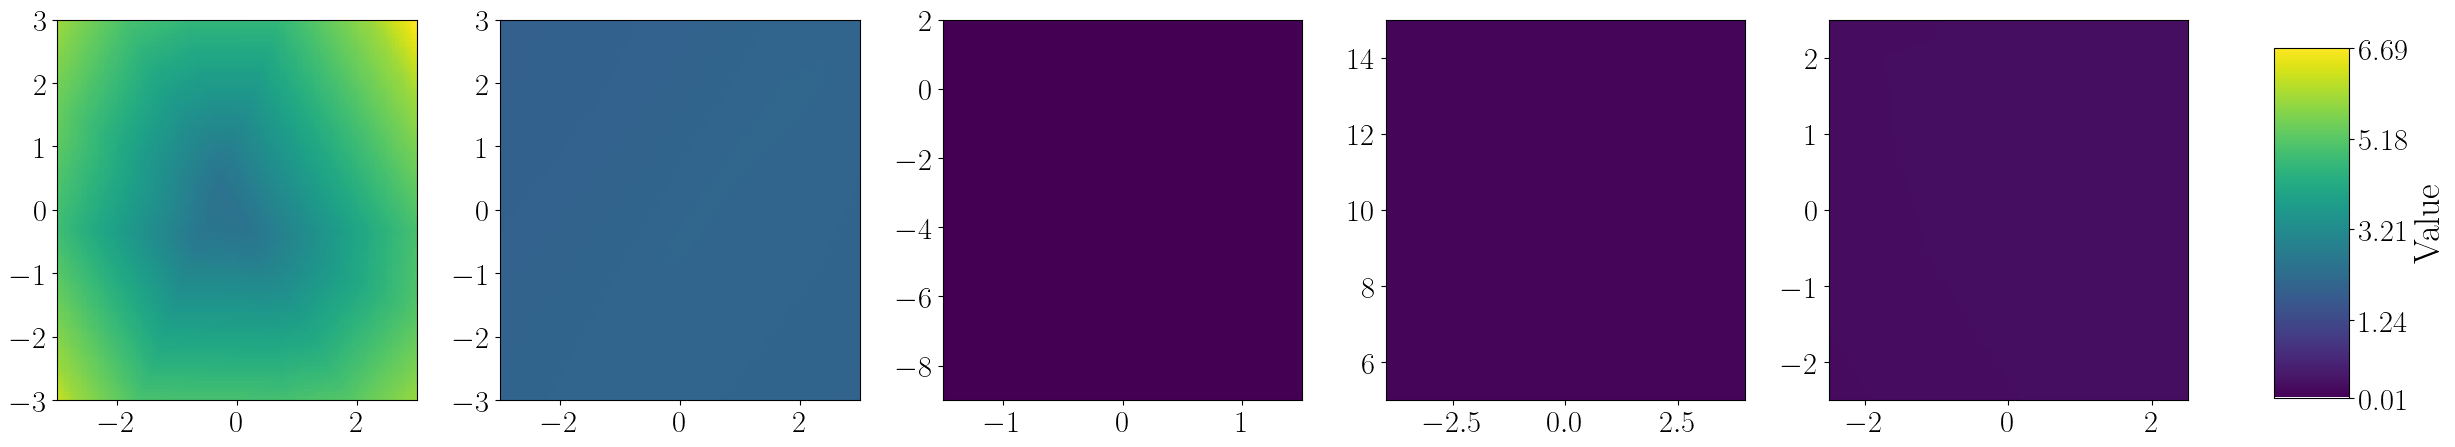

In [3]:
# 全局最小、最大
all_vals = np.concatenate([Z.ravel() for Z, *_ in items])
vmin, vmax = all_vals.min(), all_vals.max()

# 比如我们想在中段做细分，两端做粗分：
levels = np.unique(np.concatenate([
    np.linspace(vmin, vmin + 0.1*(vmax-vmin), 5),    # 前 10% 范围 5 段
    np.linspace(vmin + 0.1*(vmax-vmin), vmax - 0.1*(vmax-vmin), 20),  # 中间 80% 范围 20 段
    np.linspace(vmax - 0.1*(vmax-vmin), vmax, 5),    # 后 10% 范围 5 段
]))

AveragePolicy.plot_heatmaps_nonlinear_shared_colorbar(
    items,
    levels=levels,
    base_cmap="viridis",
    cbar_label="Value",
)

/home/laurence/Code/PythonProjects/pyrlmala/src/pyrlmala/utils/plot.py:1008: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


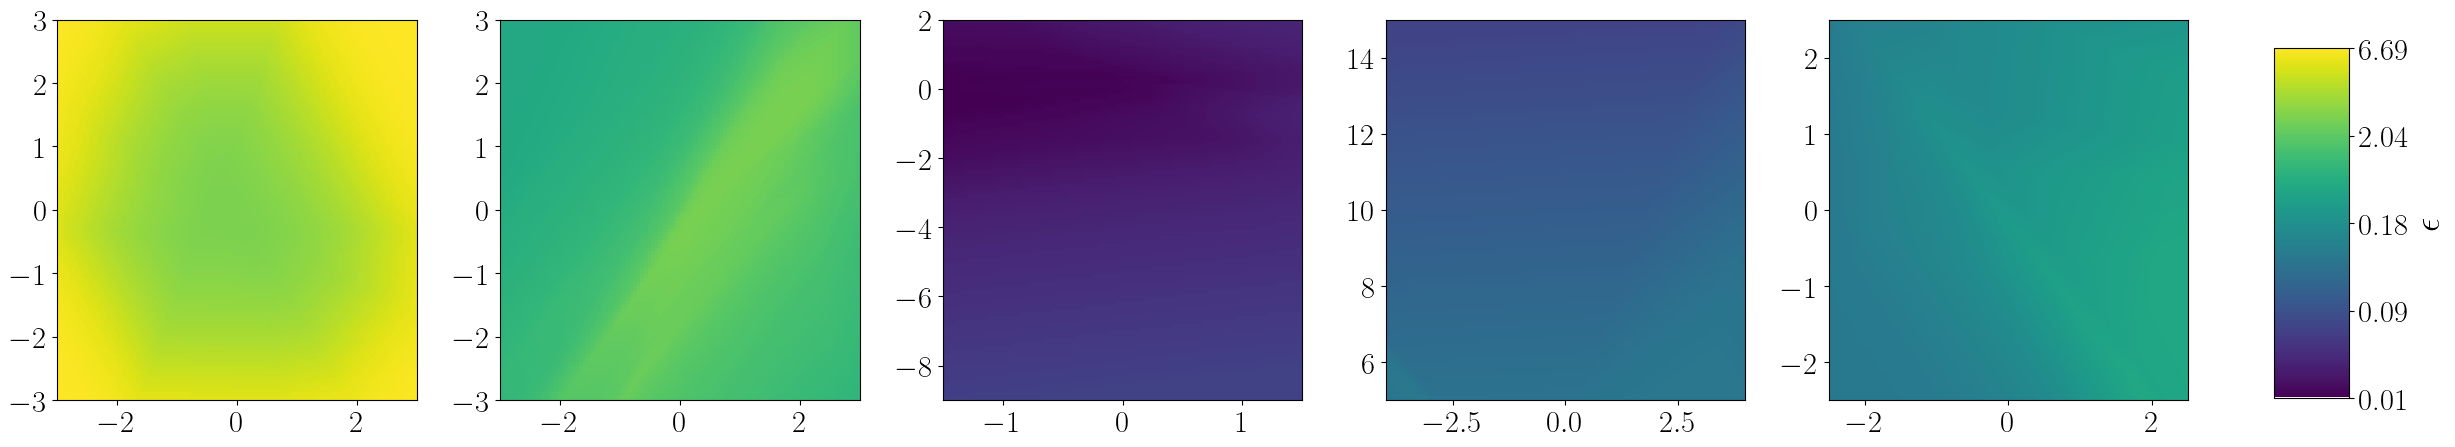

In [4]:
import numpy as np

# 1) 收集所有矩阵的值
all_vals = np.concatenate([Z.ravel() for Z, *_ in items])
vmin, vmax = all_vals.min(), all_vals.max()

# 2) 用每一个百分点做断点，共 101 个 levels
levels = np.percentile(all_vals, np.linspace(0, 100, 201))

# （如果还是不够精细，可以把 101 改成 201，甚至更多）

# 3) 调用绘图
AveragePolicy.plot_heatmaps_nonlinear_shared_colorbar(
    items=items,
    levels=levels,
    base_cmap="viridis",
    cbar_label=r"$\epsilon$",
    save_path="./policy_plot.pdf"
)
